<div style="text-align: left">CSYE 7370</div>
<div style="text-align: left">Yucong Feng</div>
<div style="text-align: left">Assignment 5</div>

# Question：
Image Generation with Autoencoders, Variational Autoencoders, and GANs

Submission: Put the data and Jupyter notebook files in a folder. Make sure all links to data are relative to the folder so the notebooks can be run.<br>
Find an image dataset other than MNIST or CIFAR. The image dataset must be pre-approved by the TA. It also cannot be the same image dataset as another student in the class unless it is TMINST.<br>

*TMNIST. For TMNIST-Alphabet (94 characters and over 281,000 images)*<br>
see https://www.kaggle.com/nikbearbrown/tmnist-alphabet-94-characters <br>
https://github.com/aiskunks/AI_Research/tree/main/dc-gan-best-practices

**Generative Architecture (60 Points)**<br>
Use a generative architecture (Autoencoders, GANs, VAEs, Diffusion Models)<br>
Create at least 40 fake images using generative architecture. How well did it do?  Adjust the size of the latent space. Change the network architecture. What combination of network architecture and latent space size gives the best trade-off between compression and quality?

**Report (30 Points)**<br>
Quality of the write-up.

**Professionalism (10 points)**<br>
Naming, explanations, and license.


This experimented used **Autoencoders, GANs, VAEs**, built networks, trained models, evaluated. 

Dataset: **TMNIST-Alphabet (94 characters and over 281,000 images)**

( https://github.com/aiskunks/AI_Research/tree/main/dc-gan-best-practices )

**Lab Environment:**

    Numpy 1.19.1
    Tensorflow 1.14.0
    Keras 2.2.5
    Platform: Colab
    
### Install and Import necessary libraries:

In [2]:
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14.0

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0
     |████████████████████████████████| 377.1 MB 8.8 kB/s 
     |████████████████████████████████| 488 kB 81.1 MB/s 
     |████████████████████████████████| 3.1 MB 69.2 MB/s 
     |████████████████████████████████| 50 kB 9.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0


In [3]:
!pip install keras==2.2.5
!pip install 'h5py==2.10.0'

     |████████████████████████████████| 336 kB 4.1 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


     |████████████████████████████████| 2.9 MB 4.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


### Data preparation:

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries:

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras import layers
from keras import models
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import keras
from keras import layers
from keras import backend as K
from keras.models import Model
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.preprocessing import image

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Check Device:

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4115377336981935795
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14303208922956095546
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12462323518199771648
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15964005991
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17506791752302391212
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


**Data Preparation:**

In [3]:
np.random.seed(99)
profile_load_path = './drive/MyDrive/Assignment5/dataset/94_character_TMNIST.csv' # file path

dataSet=pd.read_csv(profile_load_path)
list_=dataSet.values.tolist()

data = []
x = []
y = []
train_data = []
train_label = []
test_data = []
test_label = []

In [4]:
for i in range(len(list_)):
    label = list_[i][1]
    a = list_[i][2:]
    a = np.array(a)
    a = a.reshape(28, 28).tolist()
    x.append(a)
    y.append(label)
train_data, test_data, train_label, test_label = train_test_split(x,y,test_size=0.25, random_state=1)

In [5]:
# the length of train and test data
print(len(train_data))
print(len(test_data))
# output the details of the data
print(train_data[:2])
print(train_label[:2])

205569
68524
[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 65.0, 170.0, 229.0, 250.0, 241.0, 222.0, 193.0, 144.0, 71.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 149.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 133.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 114.0, 255.0, 255.0, 219.0, 75.0, 16.0, 10.0, 28.0,

Data normalization and binary conversion to improve accuracy and save memory.

In [6]:
train_data = np.array(train_data)
test_data = np.array(test_data)
train_data = train_data.astype('float32') / 255.
train_data = train_data.reshape(train_data.shape + (1,))
test_data = test_data.astype('float32') / 255.
test_data = test_data.reshape(test_data.shape + (1,))

## I. Generative Architecture (60 Points) & II. Report (30 Points)

1. VAEs: Create at least 40 fake images using generative architecture. How well did it do? Adjust the size of the latent space. Change the network architecture. What combination of network architecture and latent space size gives the best trade-off between compression and quality?

### Construct the encoder module

In [ ]:
img_shape = (28, 28, 1)
batch_size = 16
latent_dim = 2  # Dimensionality of the latent space: a plane

input_img = keras.Input(shape=img_shape)

x = layers.Conv2D(32, 3, padding='same', activation='relu')(input_img)
x = layers.Conv2D(64, 3, padding='same', activation='relu', strides=(2, 2))(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
x = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

It used **mean** and **variance** as input to the model, the function means regularization loss for creating VAEs.

In [ ]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

### Construct the decoder module

In [ ]:
decoder_input = layers.Input(K.int_shape(z)[1:])


x = layers.Dense(np.prod(shape_before_flattening[1:]), activation='relu')(decoder_input)
x = layers.Reshape(shape_before_flattening[1:])(x)
x = layers.Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(x)
x = layers.Conv2D(1, 3, padding='same', activation='sigmoid')(x)

# decoder model.
decoder = Model(decoder_input, x)

# input z -> decoder()
z_decoded = decoder(z)

### Create **reconstruction loss**, backpropagate the output image, and training.

In [ ]:
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        kl_loss = -5e-4 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x

# img -> decoded output
y = CustomVariationalLayer()([input_img, z_decoded])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# show the model
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   36928       conv2d_2[0][0]                   
___________________________________________________________________________________________

In [ ]:
vae.fit(x=train_data, y=None,
        shuffle=True,
        epochs=10,
        batch_size=batch_size,
        validation_data=(test_data, None))

Train on 205569 samples, validate on 68524 samples
Epoch 1/10
205569/205569 [==============================] - 73s 356us/step - loss: 0.2658 - val_loss: 0.1943
Epoch 2/10
205569/205569 [==============================] - 70s 339us/step - loss: 0.1881 - val_loss: 0.1879
Epoch 3/10
205569/205569 [==============================] - 66s 320us/step - loss: 0.1850 - val_loss: 0.1902
Epoch 4/10
205569/205569 [==============================] - 67s 328us/step - loss: 0.1830 - val_loss: 0.1828
Epoch 5/10
205569/205569 [==============================] - 66s 322us/step - loss: 0.1815 - val_loss: 0.1859
Epoch 6/10
205569/205569 [==============================] - 66s 322us/step - loss: 0.1808 - val_loss: 0.2028
Epoch 7/10
205569/205569 [==============================] - 67s 326us/step - loss: 0.1802 - val_loss: 0.1854
Epoch 8/10
205569/205569 [==============================] - 68s 329us/step - loss: 0.1801 - val_loss: 0.1884
Epoch 9/10
205569/205569 [==============================] - 68s 329us/step - 

### Plot result:

Since this experiment uses the **mean** and **variance** as the hidden space, the initial input of the model will use a Gaussian distribution.

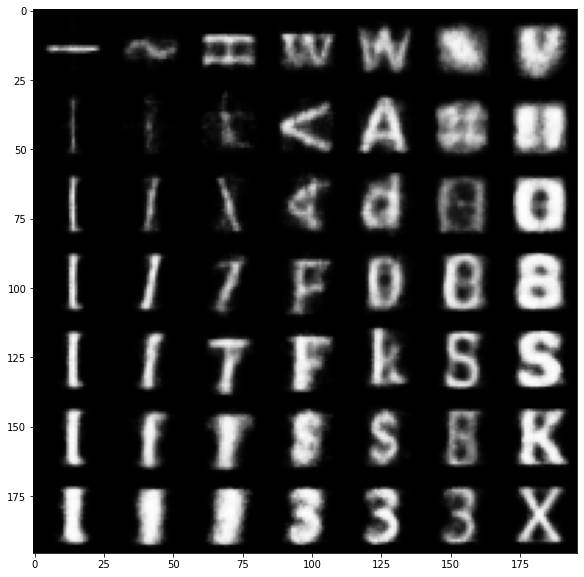

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

n = 7  # the number of decoded img
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size, j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

###Report (30 Points) --- VAEs:

Rather than compressing the input image into a fixed encoding in the latent space, VAE transforms the image into parameters of a statistical distribution, namely the mean and variance. Essentially, this means that we assume that the input image is generated by a statistical process, the randomness of which should be taken into consideration during encoding and decoding. The VAE then uses the mean and variance parameters to randomly sample an element from the distribution and decode this element to the original input. The randomness of this process increases its robustness and forces any location in the latent space to correspond to a meaningful representation, every point sampled in the latent space can be decoded into a valid output.

The working principle of VAE is as follows.
1. An encoder module converts the input sample input_img to represent two parameters z_mean and z_log_variance in the latent space.
2. Assume that the underlying normal distribution can generate the input image, and randomly sample a point z from this distribution: z = z_mean + exp(z_log_variance) * epsilon, where epsilon is a random tensor with a small value.
3. A decoder module maps this point of the latent space back to the original input image.

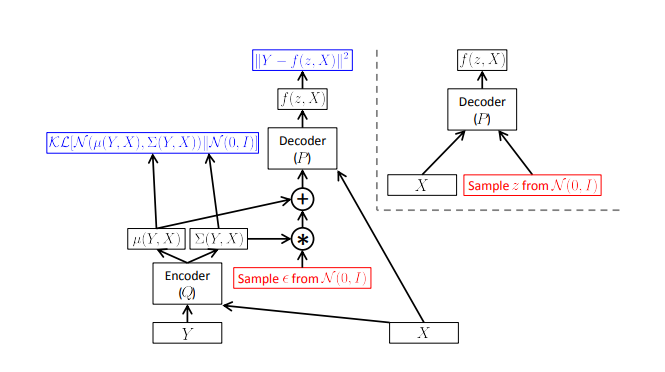

Because the epsilon is random, this process ensures that every point close to the latent position (i.e., z-mean) encoded by input_img can be decoded as an image similar to input_img, forcing the latent space to be meaningful continuously. Any two adjacent points in the latent space are decoded as highly similar images. This makes the latent space very well-structured and therefore ideal for manipulating through concept vectors.

I think the experiment is quite successful. According to the experimental results：
1. The generated pictures can basically tell which category they belong to, even there is a blurry situation, but this is understandable, because this experiment is based on the continuity function. 
2. The discrete neural network model is calculated by normal distribution, which itself has high requirements on the continuity function, and there are certain errors, but it makes the neural network have a certain explanatory significance at the mathematical level.

In this experiment, I tried to change the network structure and the latent space：
1. When I adjusted the latent space to three, the input image was no longer a plane, but a three-dimensional model, in which each layer represented different inputs under the filter
2. After training, it is found that this method does not significantly improve the experimental results, but greatly increases the model parameters. 3
3. It may because that the dataset is too simple, and the plane data can learn enough features, so it is not It is necessary to increase the latent space, and the network structure is also the best result selected after parameter adjustment, using the Gaussian distribution as the loss function

### 2. Autoencoders: Create at least 40 fake images using generative architecture. How well did it do? Adjust the size of the latent space. Change the network architecture. What combination of network architecture and latent space size gives the best trade-off between compression and quality?

### Construct plot function:

In [ ]:
def plot_AE(img_in, img_out, img_idx):

    num_img = len(img_idx)
    plt.figure(figsize=(18, 4))

    for i, image_idx in enumerate(img_idx):
        ax = plt.subplot(2, num_img, i + 1)
        plt.imshow(img_in[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, num_img, num_img + i + 1)
        plt.imshow(img_out[image_idx].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

### Create network & Train model:

In [ ]:
# encode
input_img = Input(shape=(28,28,1))
x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size=(2,2))(x)
encoded = Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same')(x)


# decode
x = Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D(size=(2,2))(x)
decoded = Conv2D(filters=1,kernel_size=(3,3), activation='sigmoid', padding='same')(x)

autoencodeur = Model(input_img, decoded)
autoencodeur.summary()




Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 1)         14

In [ ]:
# train
autoencodeur.compile(optimizer='Adam',loss='binary_crossentropy')
autoencodeur.fit(train_data, train_data, batch_size=256, epochs=5)

Epoch 1/5
205569/205569 [==============================] - 7s 36us/step - loss: 0.1298
Epoch 2/5
205569/205569 [==============================] - 7s 32us/step - loss: 0.0876
Epoch 3/5
205569/205569 [==============================] - 6s 30us/step - loss: 0.0858
Epoch 4/5
205569/205569 [==============================] - 6s 31us/step - loss: 0.0848
Epoch 5/5
205569/205569 [==============================] - 6s 31us/step - loss: 0.0841


### Plot result:

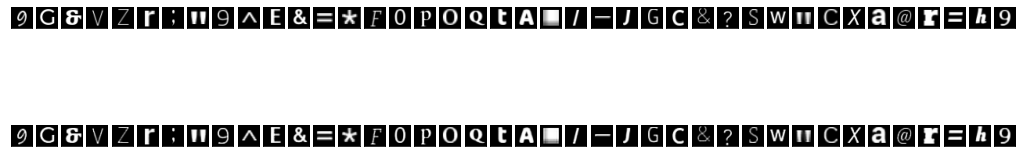

In [ ]:
num_images=40

random_test_images=np.random.randint(test_data.shape[0], size=num_images)
# predict output img
decoded_img=autoencodeur.predict(test_data)
# show input and output img
plot_AE(test_data, decoded_img, random_test_images)


### Report (30 Points) --- Autoencoders:

**Autoencoders:**

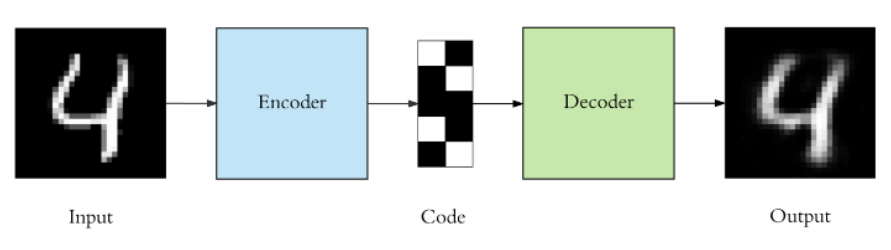

An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). The encoding is validated and refined by attempting to regenerate the input from the encoding. The autoencoder learns a representation (encoding) for a set of data, typically for dimensionality reduction, by training the network to ignore insignificant data (“noise”).

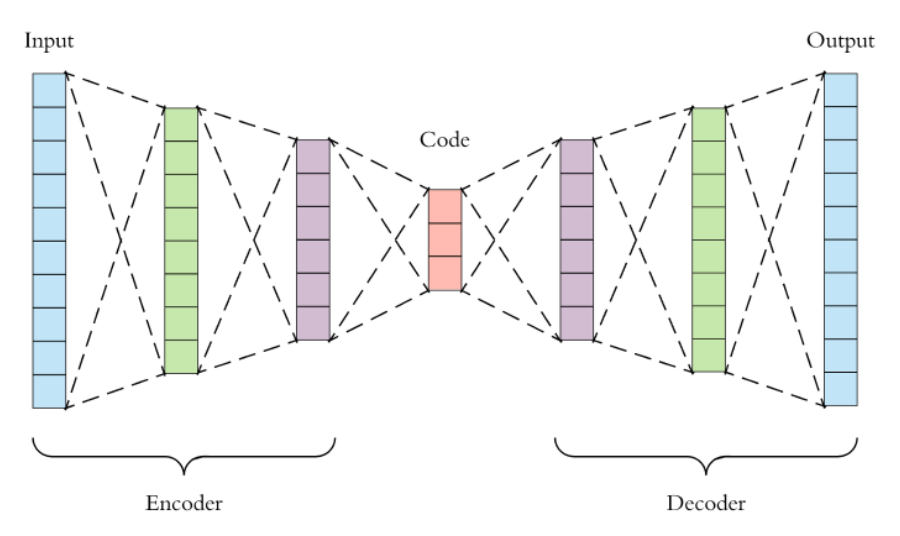

The experimental effect looks very good, and the decoded image is almost indistinguishable from the input image, but Autoencoders only learn image features through convolutional neural networks, and then decode the learned features accordingly. VAEs convert discrete data into continuous data, which can be explained mathematically; There is also no way of learning from each other by confronting Generator and Discriminator like GANs do to create novel images. So even if this method can get a good reduction effect, but compared to the other two methods, this method cannot be compared with them, it is more like the basis of the other two methods. In fact, the other two methods themselves are also from Autoencoders developed.

The Autoencoders learns the input image, obtains the low-dimensional image features through the encoder, and uses the decoder to restore the image according to the learned features. If we change the latent space, we will get images of different dimensions, just like VAEs we will get similar results to the Autoencoders input. For example, if we set latent space to 3 and we need to input a 3D image, the output will be the same 3D image. I also tried to change the network structure, and finally chose the structure shown in the code (Four-layer Convolutional Network). This method not only has a small amount of parameters, but also the output picture is almost indistinguishable from the original picture. Other network structures either have a large amount of parameters or the experimental results are almost indistinguishable from the methods used.

### 3. GANs: Create at least 40 fake images using generative architecture. How well did it do? Adjust the size of the latent space. Change the network architecture. What combination of network architecture and latent space size gives the best trade-off between compression and quality?

### Create Generate part:

**Note:**
1. Instead of sigmoid, which is more common in other types of models, we use tanh as the last activation function in the generator.
2. We sample points from the latent space using a normal distribution (Gaussian distribution) instead of a uniform distribution.
3. Randomness is good for inducing robustness. Since GAN training creates dynamic balance, GANs are likely to get "stuck" in various ways. Introducing randomness during training helps prevent this. 

There are two ways: 

**3.1  Use dropout in the discriminator.**

**3.2  Add some random noise to the discriminator's labels.**


4. Sparse gradients hinder GAN training. The max pooling operation and ReLU activation function in Gan can lead to sparsity. So instead of max pooling, strided convolution is used for downsampling, and **LeakyReLU** layers are used instead of ReLU activation layers. It is similar to ReLU, but it relaxes the sparsity constraint by allowing small negative activation values.

In [ ]:
# conf
latent_dim = 28
height = 28
width = 28
channels = 1

generator_input = keras.Input(shape=(latent_dim,))

# Generate part
x = layers.Dense(128 * 14 * 14)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((14, 14, 128))(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
# use tanh as the activation function in Generator part
x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25088)             727552    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 25088)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 256)       1

### Create Discriminator part:

For optimizer, use gradient clipping to limit the range of gradient values, use learning rate decay to stabilize the training process and add Dropout layers.

In [ ]:
discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

# Dropout for preventing Discriminator part controlling the whole network!!!!  
x = layers.Dropout(0.8)(x)

# Classification
x = layers.Dense(1, activation='sigmoid')(x)

discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()

# set optimizer -> learning rate decay and gradient clipping
discriminator_optimizer = keras.optimizers.RMSprop(lr=0.00001, clipvalue=1.0, decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer, loss='binary_crossentropy')


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       262272    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 128)         262272    
_________

### Create GAN network:

In [ ]:
# set weights of Discriminator part to non-trainable for Generator part
discriminator.trainable = False

gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)

gan_optimizer = keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

### Train the model:

Add random noise to Discriminator labels.

In [ ]:
# set steps and parameters
iterations = 4500
batch_size = 20

# start training
start = 0
for step in range(iterations):
    
    # train Discriminator part
    # initial input data/latent vectors
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
    # generate faked pic
    generated_images = generator.predict(random_latent_vectors)
    # mix faked images with real images
    stop = start + batch_size
    real_images = train_data[start: stop]
    combined_images = np.concatenate([generated_images, real_images])
    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    # mix noise
    labels += 0.05 * np.random.random(labels.shape)
    # train the Discriminator part
    d_loss = discriminator.train_on_batch(combined_images, labels)

    # train GAN part
    # initial input data/latent vectors
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))
    # set labels for faked images
    misleading_targets = np.zeros((batch_size, 1))
    # train GAN part and freeze discriminator
    a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)

    # judge when to stop
    start += batch_size
    if start > len(train_data) - batch_size:
    start = 0

    # output log
    if step % 100 == 0:
        print('discriminator loss at step %s: %s' % (step, d_loss))
        print('adversarial loss at step %s: %s' % (step, a_loss))


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


discriminator loss at step 0: 0.6965388
adversarial loss at step 0: 0.693258


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


discriminator loss at step 100: 0.69848937
adversarial loss at step 100: 0.6895148
discriminator loss at step 200: 0.7089857
adversarial loss at step 200: 0.6866026
discriminator loss at step 300: 0.7083589
adversarial loss at step 300: 0.70398635
discriminator loss at step 400: 0.68781084
adversarial loss at step 400: 0.6898704
discriminator loss at step 500: 0.69857943
adversarial loss at step 500: 0.6732591
discriminator loss at step 600: 0.7006069
adversarial loss at step 600: 0.6992764
discriminator loss at step 700: 0.6892055
adversarial loss at step 700: 0.7157203
discriminator loss at step 800: 0.68627656
adversarial loss at step 800: 0.7024475
discriminator loss at step 900: 0.6814133
adversarial loss at step 900: 0.7259377
discriminator loss at step 1000: 0.6870735
adversarial loss at step 1000: 0.70438945
discriminator loss at step 1100: 0.68740714
adversarial loss at step 1100: 0.7045315
discriminator loss at step 1200: 0.69442695
adversarial loss at step 1200: 0.7248022
di

### Test trained model and Plot:

(28, 28, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


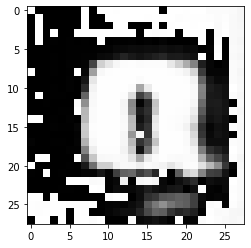

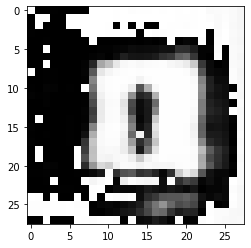

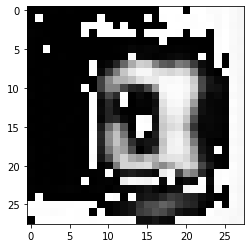

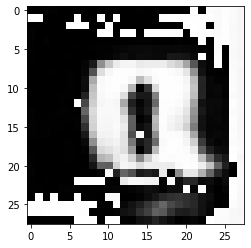

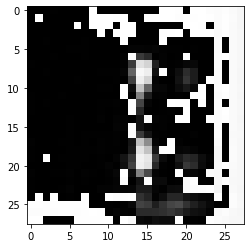

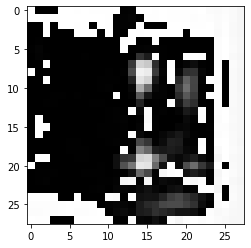

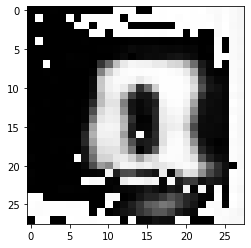

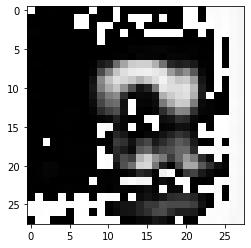

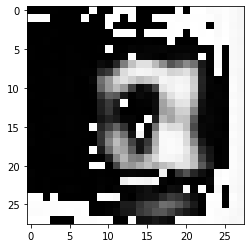

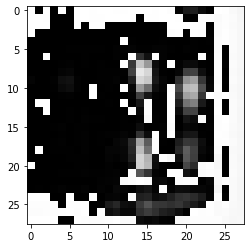

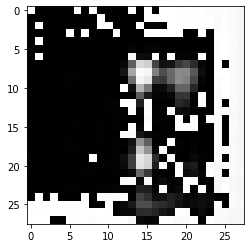

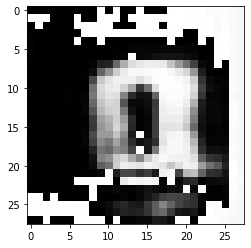

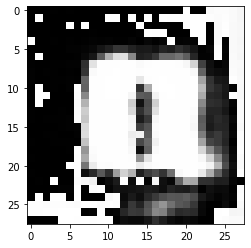

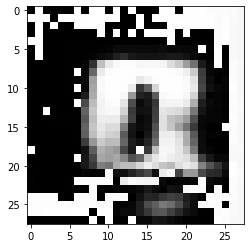

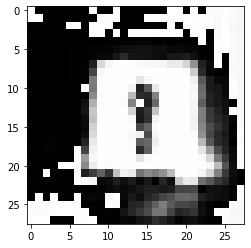

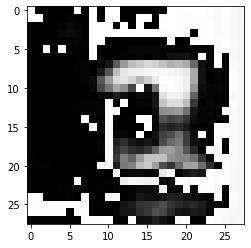

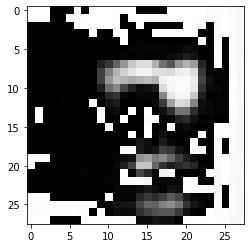

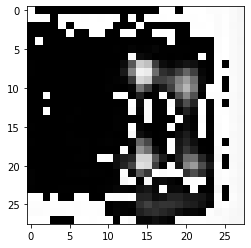

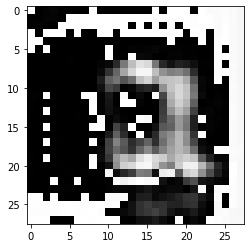

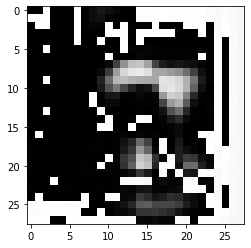

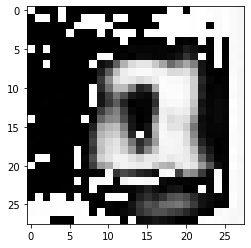

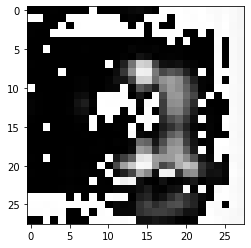

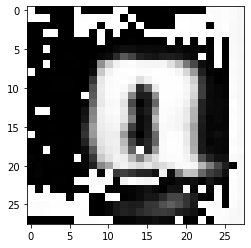

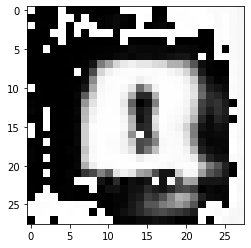

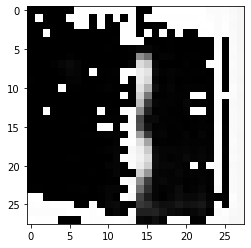

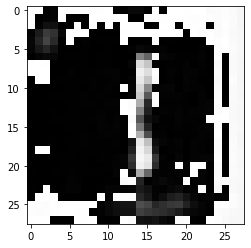

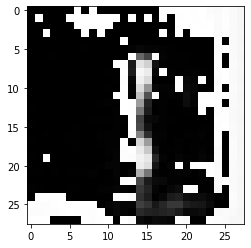

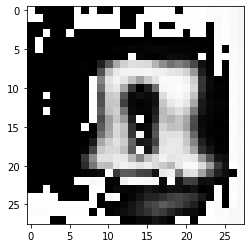

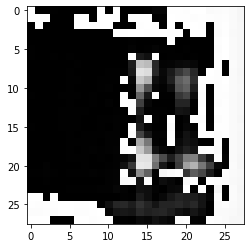

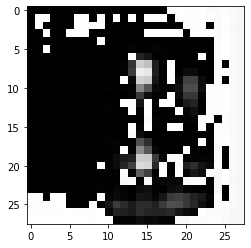

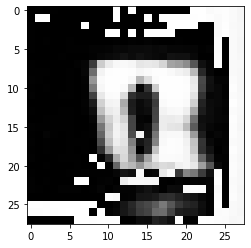

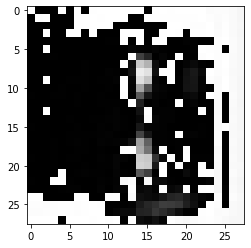

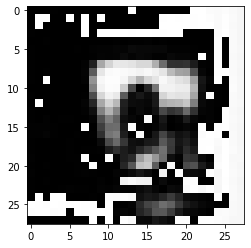

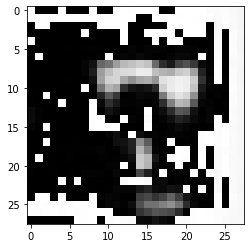

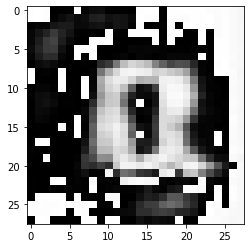

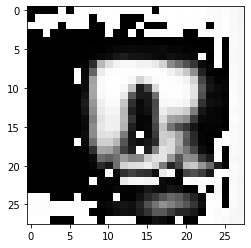

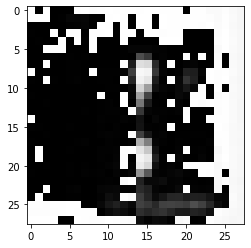

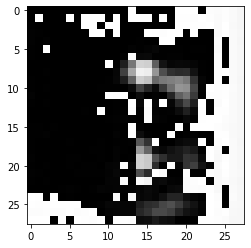

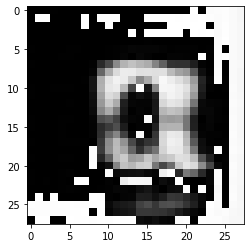

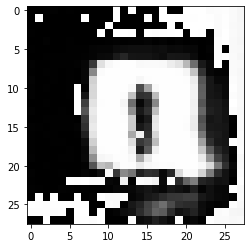

In [ ]:
# generate test data(#40)
random_latent_vectors = np.random.normal(size=(40, latent_dim))
# decode input data to faked images
generated_images = generator.predict(random_latent_vectors)

# print the shape of faked images
print(np.array(generated_images[2]).shape)

# plot
for i in range(generated_images.shape[0]):
    img = image.array_to_img(generated_images[i] * 255., scale=False)
    plt.figure()
    plt.imshow(img,cmap='gray')
    
plt.show()

### Report (30 Points) --- GANs:

**GANs implementation process:**

Step 1: The Generator part maps a vector of shape (latent_dim, ) to an image of shape (28, 28, 1).

Step 2: The Discriminator part maps an image of shape (28, 28, 1) to a binary score that evaluates the probability that the image is true.

Step 3: The GAN network connects the Generator part and the Discriminator part together **(gan(x) = discriminator(generator(x)))**. The Generator part decodes latent space vectors into images, and the Discriminator part evaluates the authenticity of these images, so the GAN network is the evaluation result of mapping these latent vectors to the discriminator.

Step 4: In each step of the training process, we will randomly sample data from the normal distribution, mix it with the output image and the real image after passing through the Generator part, and input the mixed image into the Discriminator part. Add random noise to the labels during the mixing process to improve the training effect of the GAN network. When the Discriminator part training is completed, freeze the Discriminator part of the GAN network, use the weight of the trained Discriminator part to train the Generator part, and use the binary cross-entropy function as the loss function, that is, only determine whether the input image is a real image.

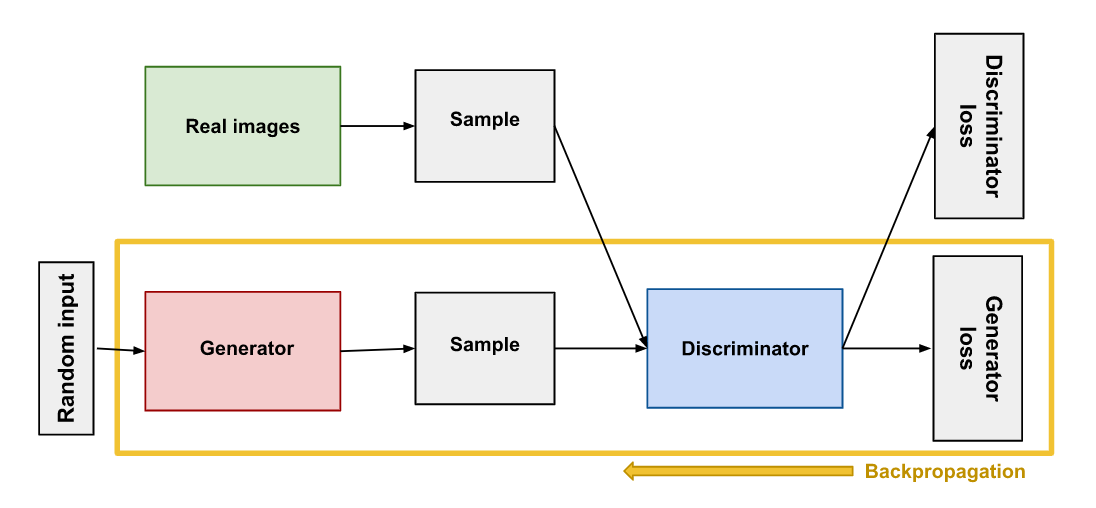

It can be seen from the experimental results that the training of the GAN network is still difficult and requires metaphysical parameter adjustment. Although the meaning represented by the generated image can be recognized, the image contains checkerboard shadows and is not clear enough. I tried different network structures, repeatedly adjust the parameters, still the training results do not have excellent performance. 

The latent space used in this experiment is **28**, which is also the size of the input image. This is because the GAN network trains parameters through two network confront each other.
1. We need to keep the input utilized as much as possible, instead of upsampling the low-dimensional data, which requires too much details of the model, and there will be too high sparsity. 
2. The GAN network is a rare application in deep learning that does not require too high sparsity. 
According to the experimental results, it can be clearly judged that the output images are not better than the original settings, too small will lead to blurred images, too large will make the loss function of the network unable to decrease, it means that the Discriminator part 'kidnapped' the Generator part.

The Generator part of the final network adopts a four-layer convolutional network, in which **Conv2DTranspose** is used to replace the maximum pooling layer for downsampling to prevent the network from being too sparse, and LeakyReLU is used as the activation function. 
When the neuron is not activated, it still allows a small gradient to be given to prevent overfitting, and the tanh function is used in the output part of the network. For the Discriminator part, the four-layer convolutional network and the LeakyReLU activation function are also used, but the Dropout function is used before the output, which is set to 0.8, which is to prevent the Discriminator part from 'kidnapping' the Generator part. Use gradient clipping to limit the range of gradient values, and to stabilize the training process, use learning rate decay with learning rate set to **0.00001**.

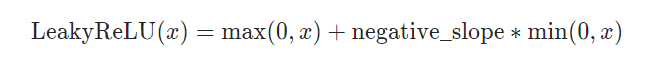

In general, although the GAN network is more difficult to train, the final result can still identify the meaning represented by the image, so the experiment is successful to a certain extent. And I only trained 4400 steps. If I continue to train, according to the log, the network is not over-fitting and is still stable, so the accuracy can continue to be improved on this dataset.

## III. Professionalism (10 points)

In this experiment, I explored the three networks of VAEs, GANs, and Autoencoders. Not only did I conduct multiple experiments on their own properties, but also made a horizontal comparison of them. I have written in detail in the Report part of each network. In the process of implementing the methods, I referred to the book 'Deep Learning with Python' by François Chollet. And I also attached the license in the zip file.

Here is the link of the book: https://www.manning.com/books/deep-learning-with-python

    MIT License

    Copyright (c) 2021 Yucong Feng

    Permission is hereby granted, free of charge, to any person obtaining a copy
    of this software and associated documentation files (the "Software"), to deal
    in the Software without restriction, including without limitation the rights
    to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
    copies of the Software, and to permit persons to whom the Software is
    furnished to do so, subject to the following conditions:

    The above copyright notice and this permission notice shall be included in all
    copies or substantial portions of the Software.

    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
    IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
    FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
    AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
    LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
    OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
    SOFTWARE.